In [26]:
import geopandas as gpd

# Obtener un mapa

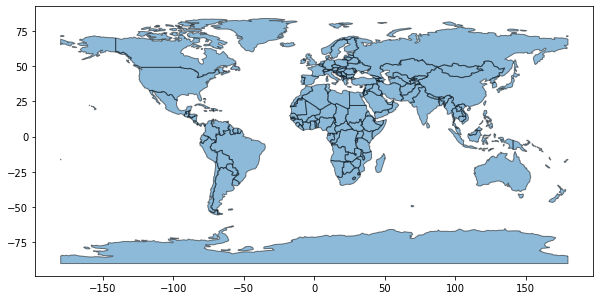

In [2]:
# Obtener un mapa
df = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Obtener puntos aleatorios
Obtenido e inspirado de [StackExchange](https://gis.stackexchange.com/questions/294394/randomly-sample-from-geopandas-dataframe-in-python)

In [3]:
from shapely.geometry import Point
import random

In [4]:
######
def random_points_in_polygon(number, polygon):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro de un polígono 'polygon'.
    """
    points = []
    ptos = min_x, min_y, max_x, max_y = polygon.bounds
    i = 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  # returns list of shapely point
######

In [5]:
######
def random_points_in_geodataframe_v1(number, gdf):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro 
    de un GeoDataFrame 'gdf'. Versión 1.
    """
    N = len(gdf)
    points = []
    i = 0
    while i < number:
        # País aleatorio
        j = random.randint(0, N)
        polygon = gdf.iloc[j].geometry
        point = random_points_in_polygon(1, polygon)
        points += point
        i += 1
        
    return points
######

In [6]:
######
def random_points_in_geodataframe_v2(number, gdf):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro 
    de un GeoDataFrame 'gdf'. Versión 2.
    """
    from shapely.ops import cascaded_union
    boundary = cascaded_union(gdf['geometry'])
    points = random_points_in_polygon(number, boundary)    
    return points
######

La segunda versión es mejor, pues el área del país pondera la probabilidad de que un punto aparezca en él.

In [7]:
df_ = df[df["continent"] != "Antarctica"]
df_ = df_[df_["continent"] != "Seven seas (open ocean)"]
# df_ = df_[df_["continent"] == "South America"]
# df__ = df_[df_["name"] == "Chile"]

In [8]:
df_

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [9]:
# Generamos números aleatorios
points = random_points_in_geodataframe_v2(8000, df_)

In [10]:
# for i, point in enumerate(points):
#     print("Point {}: ({},{})".format(str(i+1), point.x, point.y))

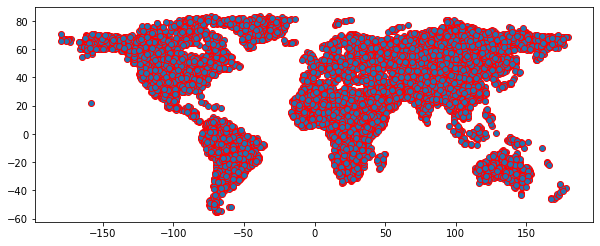

In [15]:
# Hacemos un GeoSeries a partir de los puntos
df_points = gpd.GeoSeries(points)
df_points.plot(figsize=(10, 10), edgecolor='r')

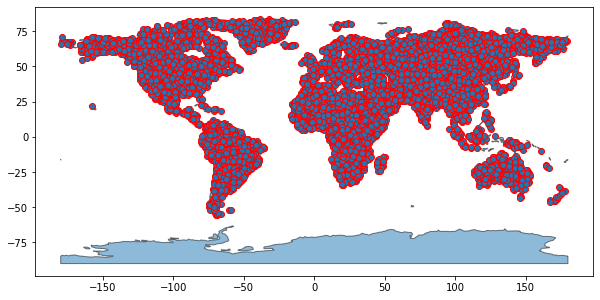

In [12]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df_points.plot(figsize=(10, 10), edgecolor='r', ax=ax)

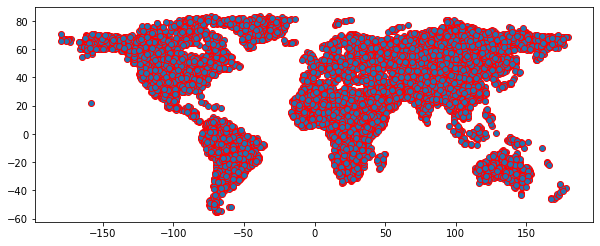

In [21]:
df_points_ = gpd.GeoDataFrame({"geometry": df_points})
df_points_.plot(figsize=(10, 10), edgecolor='r')

# Crear nueva clase de no-landslide

In [24]:
df_points_.to_file("data/no_landslide.shp")

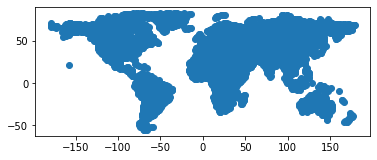

In [25]:
df_points__ = gpd.read_file(
    "data/no_landslide.shp"
)
df_points__.plot()

In [13]:
from src.ReMasFrame import ReMasFrame

In [28]:
remas = ReMasFrame()

In [105]:
import random
import time

def str_time_prop(start, end, format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formated in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))


def random_date(start, end, prop):
    return str_time_prop(start, end, '%Y-%m-%d', prop)

print(random_date("1988-11-07", "2017-09-26", random.random()))

2000-08-18


In [103]:
times = remas["event_date"].map(lambda x: (time.strptime(x, '%Y-%m-%d')))

In [104]:
min(times), max(times)

(time.struct_time(tm_year=1988, tm_mon=11, tm_mday=7, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=312, tm_isdst=-1),
 time.struct_time(tm_year=2017, tm_mon=9, tm_mday=26, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=269, tm_isdst=-1))

In [116]:
df_points_["event_date"] = [
    random_date("2013-10-01", "2013-12-01", random.random()) for _ in df_points_["geometry"]
]

In [117]:
df_points_

,geometry,event_date
0,POINT (42.48557 4.60971),2013-10-12
1,POINT (-103.76532 29.46573),2013-11-08
2,POINT (146.40797 65.17484),2013-11-20
3,POINT (-69.33075 -36.24940),2013-11-13
4,POINT (-103.06292 37.31468),2013-11-28
...,...,...
7995,POINT (57.54331 25.73189),2013-10-27
7996,POINT (14.37380 6.04854),2013-11-12
7997,POINT (92.03257 45.83063),2013-11-02
7998,POINT (72.37326 32.76254),2013-11-01


In [118]:
df_points_.to_file("data/no_landslide.shp")

,event_date,geometry
0,2013-10-12,POINT (42.48557 4.60971)
1,2013-11-08,POINT (-103.76532 29.46573)
2,2013-11-20,POINT (146.40797 65.17484)
3,2013-11-13,POINT (-69.33075 -36.24940)
4,2013-11-28,POINT (-103.06292 37.31468)
...,...,...
7995,2013-10-27,POINT (57.54331 25.73189)
7996,2013-11-12,POINT (14.37380 6.04854)
7997,2013-11-02,POINT (92.03257 45.83063)
7998,2013-11-01,POINT (72.37326 32.76254)


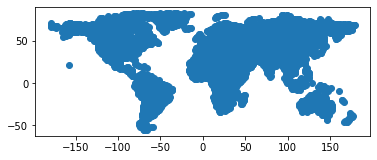

In [119]:
df_points__ = gpd.read_file(
    "data/no_landslide.shp"
)
df_points__.plot()
df_points__